In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
ds = ['emodb', 'emovo', 'ravdess']

In [3]:
mtd_ls = {}
for d in ds:
    mtd_ls[d] = pd.read_csv(f"/datasets/nicolas_facchinetti/img_data/{d}_df.csv")

In [4]:
mtd_ls[ds[0]]

,Path,Label,Actor
0,/datasets/nicolas_facchinetti/img_data/emodb/0...,sad,13
1,/datasets/nicolas_facchinetti/img_data/emodb/1...,sad,13
2,/datasets/nicolas_facchinetti/img_data/emodb/2...,sad,13
3,/datasets/nicolas_facchinetti/img_data/emodb/3...,sad,13
4,/datasets/nicolas_facchinetti/img_data/emodb/4...,sad,13
...,...,...,...
6177,/datasets/nicolas_facchinetti/img_data/emodb/6...,happy,8
6178,/datasets/nicolas_facchinetti/img_data/emodb/6...,happy,8
6179,/datasets/nicolas_facchinetti/img_data/emodb/6...,happy,8
6180,/datasets/nicolas_facchinetti/img_data/emodb/6...,happy,8


In [5]:
mtd_ls[ds[1]]

,Path,Label,Actor
0,/datasets/nicolas_facchinetti/img_data/emovo/0...,happy,m3
1,/datasets/nicolas_facchinetti/img_data/emovo/1...,happy,m3
2,/datasets/nicolas_facchinetti/img_data/emovo/2...,happy,m3
3,/datasets/nicolas_facchinetti/img_data/emovo/3...,happy,m3
4,/datasets/nicolas_facchinetti/img_data/emovo/4...,happy,m3
...,...,...,...
6901,/datasets/nicolas_facchinetti/img_data/emovo/6...,angry,m2
6902,/datasets/nicolas_facchinetti/img_data/emovo/6...,angry,m2
6903,/datasets/nicolas_facchinetti/img_data/emovo/6...,angry,m2
6904,/datasets/nicolas_facchinetti/img_data/emovo/6...,angry,m2


In [6]:
mtd_ls[ds[2]]

,Path,Label,Actor
0,/datasets/nicolas_facchinetti/img_data/ravdess...,angry,Actor_15
1,/datasets/nicolas_facchinetti/img_data/ravdess...,angry,Actor_15
2,/datasets/nicolas_facchinetti/img_data/ravdess...,angry,Actor_15
3,/datasets/nicolas_facchinetti/img_data/ravdess...,angry,Actor_15
4,/datasets/nicolas_facchinetti/img_data/ravdess...,angry,Actor_15
...,...,...,...
12451,/datasets/nicolas_facchinetti/img_data/ravdess...,disgust,Actor_13
12452,/datasets/nicolas_facchinetti/img_data/ravdess...,disgust,Actor_13
12453,/datasets/nicolas_facchinetti/img_data/ravdess...,disgust,Actor_13
12454,/datasets/nicolas_facchinetti/img_data/ravdess...,disgust,Actor_13


In [7]:
random_state = 1997

In [8]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant', 'prior']

def dummy_scores(d):
    y = d['Label']
    X = d.drop('Label', axis = 1)
    X = X.drop('Actor', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    

    test_scores = []
    for s in strategies:
        if s =='constant':
            dclf = DummyClassifier(strategy = s, random_state = random_state, constant ='happy')
        else:
            dclf = DummyClassifier(strategy = s, random_state = random_state)
        dclf.fit(X_train, y_train)
        score = dclf.score(X_test, y_test)
        test_scores.append(score)
    return test_scores

In [9]:
scores = {d: dummy_scores(mtd_ls[d]) for d in ds}

In [10]:
def plot_scores(scores):
    strategies = ['most_frequent', 'stratified', 'uniform', 'constant', 'prior']
    plt.plot(strategies, scores, 'ro')
    plt.show()

emodb


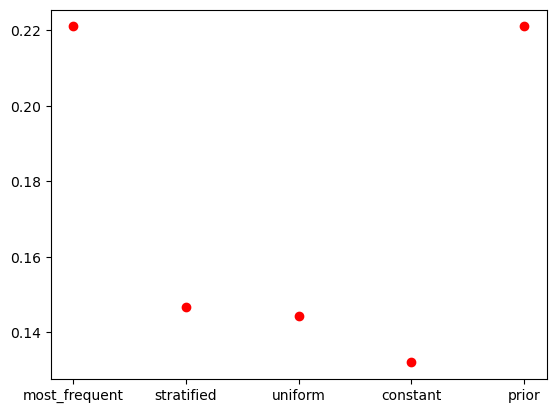

emovo


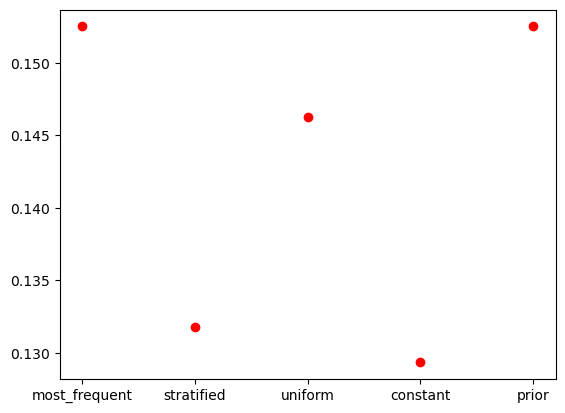

ravdess


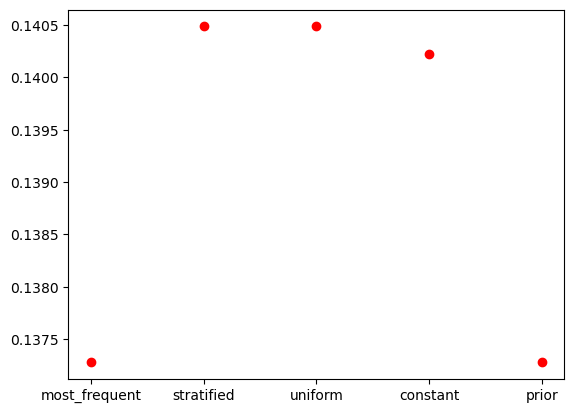

In [11]:
for d in ds:
    print(d)
    plot_scores(scores[d])

In [12]:
best_strategies = []
for d in ds:
    max_value = max(scores[d])
    max_index = scores[d].index(max_value)
    best_strategies.append(strategies[max_index])
    print(f'For {d} best strategy is {strategies[max_index]} with score {max_value}')

For emodb best strategy is most_frequent with score 0.2210242587601078
For emovo best strategy is most_frequent with score 0.1525096525096525
For ravdess best strategy is stratified with score 0.1404870216751405


In [13]:
best_strategies

['most_frequent', 'most_frequent', 'stratified']

emodb with most_frequent
emovo with most_frequent
ravdess with stratified


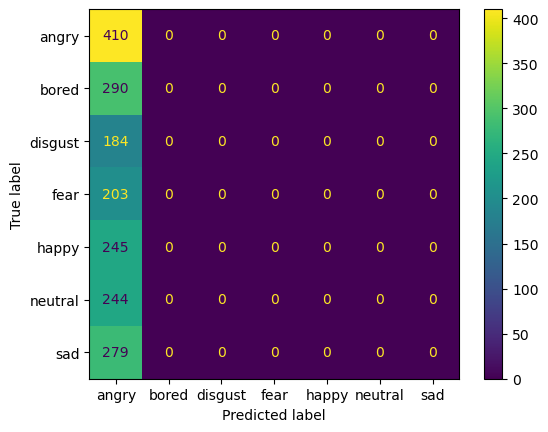

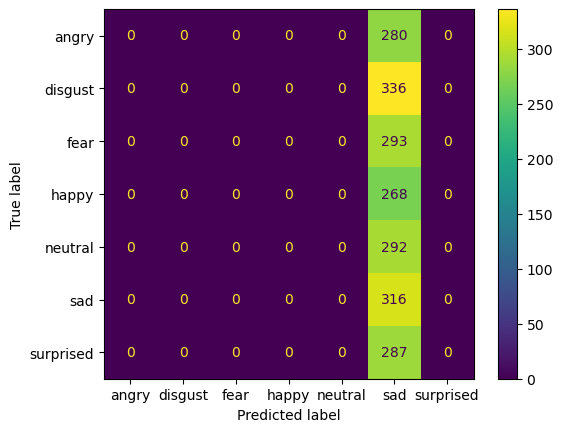

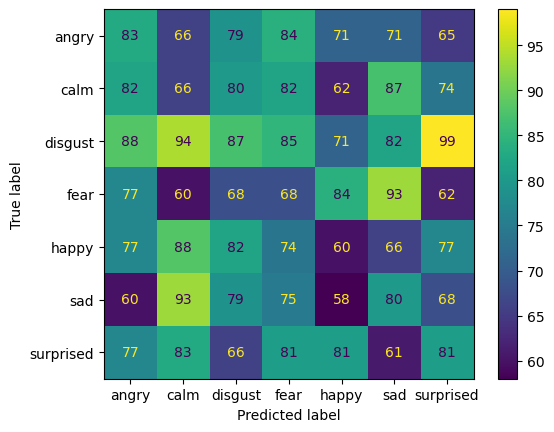

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for st, d in zip(best_strategies, mtd_ls):
    print(f'{d} with {st}')
    ds = mtd_ls[d]
    y = ds['Label']
    X = ds.drop('Label', axis = 1)
    X = X.drop('Actor', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    
    if st =='constant':
        dclf = DummyClassifier(strategy = st, random_state = random_state, constant ='happy')
    else:
        dclf = DummyClassifier(strategy = st, random_state = random_state)
        
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=dclf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dclf.classes_)
    disp.plot()